In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import statsmodels.formula.api as smf
from sklearn import metrics


## 1. Apertura de archivo

In [126]:
modelamiento_fraude=pd.read_csv("C:/Users/cgarciaa/Downloads/MODELAMIENTO_MONTO_FRAUDE.csv", sep=';')

In [127]:
modelamiento_fraude

,ID,MONTO_FRAUDE,FECHA_INICIAL,FECHA_DETECCION,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES
0,1,82982,01-01-2023,04-01-2023,1,TARJETA_CREDITO,0,0
1,2,819785,01-01-2023,03-01-2023,1,TARJETA_CREDITO,1,5
2,3,545622,01-01-2023,06-01-2023,3,TARJETA_DEBITO,1,5
3,4,96457,02-01-2023,05-01-2023,4,TARJETA_CREDITO,0,0
4,5,195487,02-01-2023,04-01-2023,5,TARJETA_CREDITO,0,0
...,...,...,...,...,...,...,...,...
7107,7108,22360,13-02-2023,16-02-2023,1,TARJETA_CREDITO,0,0
7108,7109,440760,13-02-2023,16-02-2023,3,TARJETA_CREDITO,0,8
7109,7110,566218,13-02-2023,15-02-2023,8,TARJETA_CREDITO,1,1
7110,7111,5284096,13-02-2023,15-02-2023,33,TARJETA_CREDITO,1,9


In [173]:
modelamiento_fraude['MONTO_FRAUDE_LOG'] = np.log1p(modelamiento_fraude['MONTO_FRAUDE'])

In [174]:
modelamiento_fraude

,ID,MONTO_FRAUDE,FECHA_INICIAL,FECHA_DETECCION,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,MONTO_FRAUDE_LOG
0,1,82982,01-01-2023,04-01-2023,1,TARJETA_CREDITO,0,0,11.326391
1,2,819785,01-01-2023,03-01-2023,1,TARJETA_CREDITO,1,5,13.616799
2,3,545622,01-01-2023,06-01-2023,3,TARJETA_DEBITO,1,5,13.209684
3,4,96457,02-01-2023,05-01-2023,4,TARJETA_CREDITO,0,0,11.476863
4,5,195487,02-01-2023,04-01-2023,5,TARJETA_CREDITO,0,0,12.183254
...,...,...,...,...,...,...,...,...,...
7107,7108,22360,13-02-2023,16-02-2023,1,TARJETA_CREDITO,0,0,10.015074
7108,7109,440760,13-02-2023,16-02-2023,3,TARJETA_CREDITO,0,8,12.996258
7109,7110,566218,13-02-2023,15-02-2023,8,TARJETA_CREDITO,1,1,13.246736
7110,7111,5284096,13-02-2023,15-02-2023,33,TARJETA_CREDITO,1,9,15.480212


## 2. Separación muestra testeo y entrenamiento

In [128]:
np.random.seed(15)
n_filas = modelamiento_fraude.shape[0]
id_entrenamiento = list(np.random.choice(n_filas, size=int(0.7*n_filas), replace=False))
data_train = modelamiento_fraude.iloc[id_entrenamiento]
data_test = modelamiento_fraude.drop(id_entrenamiento)

## 3. Analisis descriptivo

In [129]:
data_train.describe()

,ID,MONTO_FRAUDE,N_OPERACIONES,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES
count,4978.000000,4.978000e+03,4978.000000,4978.000000,4978.000000
mean,3551.595621,6.157337e+05,7.330052,0.147851,1.916432
std,2055.208876,1.538815e+06,14.833499,0.354987,3.171960
min,1.000000,1.025500e+04,1.000000,0.000000,0.000000
25%,1781.250000,8.036100e+04,2.000000,0.000000,0.000000
50%,3544.000000,1.459300e+05,4.000000,0.000000,0.000000
75%,5335.500000,4.450132e+05,5.000000,0.000000,3.750000
max,7112.000000,9.399692e+06,96.000000,1.000000,10.000000


In [130]:
duplicados = data_train.duplicated().sum()
print(f'Hay {duplicados} valores duplicados')

Hay 0 valores duplicados


In [131]:
valores_faltantes = data_train.isnull().sum()
valores_faltantes[valores_faltantes > 0]
print(f'{valores_faltantes}')

ID                      0
MONTO_FRAUDE            0
FECHA_INICIAL           0
FECHA_DETECCION         0
N_OPERACIONES           0
TIPO_PRODUCTO           0
FLAG_CLIENTE_EMPRESA    0
N_FRAUDES_ANTERIORES    0
dtype: int64


In [132]:
data_train.dtypes

ID                       int64
MONTO_FRAUDE             int64
FECHA_INICIAL           object
FECHA_DETECCION         object
N_OPERACIONES            int64
TIPO_PRODUCTO           object
FLAG_CLIENTE_EMPRESA     int64
N_FRAUDES_ANTERIORES     int64
dtype: object

In [133]:
data_train

,ID,MONTO_FRAUDE,FECHA_INICIAL,FECHA_DETECCION,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES
2229,2230,17130,02-02-2023,06-02-2023,1,TARJETA_CREDITO,0,0
3796,3797,600416,29-01-2023,30-01-2023,8,TARJETA_CREDITO,0,0
3581,3582,47940,05-01-2023,08-01-2023,2,TARJETA_CREDITO,0,0
4030,4031,74236,23-02-2023,25-02-2023,3,TARJETA_CREDITO,0,0
3629,3630,38865,11-01-2023,13-01-2023,1,TARJETA_CREDITO,0,0
...,...,...,...,...,...,...,...,...
994,995,91866,29-04-2023,02-05-2023,4,TARJETA_DEBITO,0,0
7108,7109,440760,13-02-2023,16-02-2023,3,TARJETA_CREDITO,0,8
5083,5084,113169,10-03-2023,16-03-2023,5,TARJETA_CREDITO,0,6
5679,5680,157043,19-04-2023,21-04-2023,1,TARJETA_DEBITO,0,0


In [134]:
data_train['FECHA_INICIAL'] = pd.to_datetime(data_train['FECHA_INICIAL'], format='%d-%m-%Y')
data_train['FECHA_DETECCION'] = pd.to_datetime(data_train['FECHA_DETECCION'], format='%d-%m-%Y')

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\2819521865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FECHA_INICIAL'] = pd.to_datetime(data_train['FECHA_INICIAL'], format='%d-%m-%Y')
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\2819521865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FECHA_DETECCION'] = pd.to_datetime(data_train['FECHA_DETECCION'], format='%d-%m-%Y')


In [135]:
data_train.dtypes

ID                               int64
MONTO_FRAUDE                     int64
FECHA_INICIAL           datetime64[ns]
FECHA_DETECCION         datetime64[ns]
N_OPERACIONES                    int64
TIPO_PRODUCTO                   object
FLAG_CLIENTE_EMPRESA             int64
N_FRAUDES_ANTERIORES             int64
dtype: object

In [136]:
data_train

,ID,MONTO_FRAUDE,FECHA_INICIAL,FECHA_DETECCION,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES
2229,2230,17130,2023-02-02,2023-02-06,1,TARJETA_CREDITO,0,0
3796,3797,600416,2023-01-29,2023-01-30,8,TARJETA_CREDITO,0,0
3581,3582,47940,2023-01-05,2023-01-08,2,TARJETA_CREDITO,0,0
4030,4031,74236,2023-02-23,2023-02-25,3,TARJETA_CREDITO,0,0
3629,3630,38865,2023-01-11,2023-01-13,1,TARJETA_CREDITO,0,0
...,...,...,...,...,...,...,...,...
994,995,91866,2023-04-29,2023-05-02,4,TARJETA_DEBITO,0,0
7108,7109,440760,2023-02-13,2023-02-16,3,TARJETA_CREDITO,0,8
5083,5084,113169,2023-03-10,2023-03-16,5,TARJETA_CREDITO,0,6
5679,5680,157043,2023-04-19,2023-04-21,1,TARJETA_DEBITO,0,0


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\1731685051.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(data[col].mean(), color='red', linestyle='--', label=f'$\mu$ = {data[col].mean():.2f}')


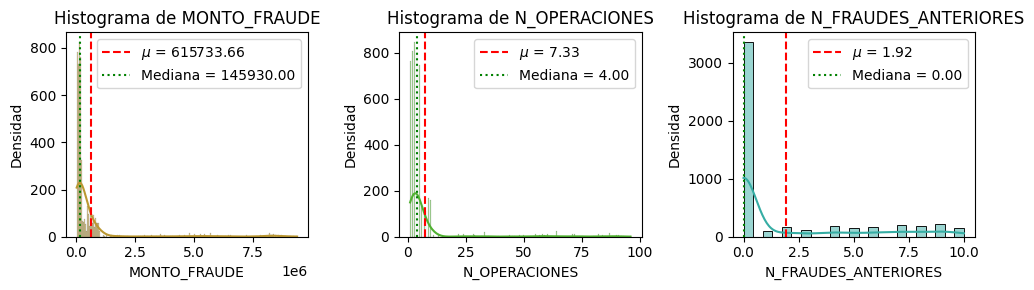

In [137]:
def generar_histogramas(data, columnas):
    # Definir el tamaño de la figura basado en el número de columnas
    num_vars = len(columnas)
    filas = (num_vars + 2) // 3  # Ajuste dinámico para la cantidad de filas
    plt.figure(figsize=(10, 3 * filas))

    # Crear subplots para cada columna especificada
    for i, col in enumerate(columnas, 1):
        plt.subplot(filas, 3, i)
        sns.histplot(data[col], kde=True, color=sns.color_palette("husl")[i % 10])
        plt.axvline(data[col].mean(), color='red', linestyle='--', label=f'$\mu$ = {data[col].mean():.2f}')
        plt.axvline(data[col].median(), color='green', linestyle=':', label=f'Mediana = {data[col].median():.2f}')
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Densidad")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# Especifica las columnas que quieres analizar
columnas_a_analizar = ['MONTO_FRAUDE', 'N_OPERACIONES', 'N_FRAUDES_ANTERIORES']
generar_histogramas(data_train, columnas_a_analizar)

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4149684094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='TIPO_PRODUCTO ', data=data_train, palette="viridis")


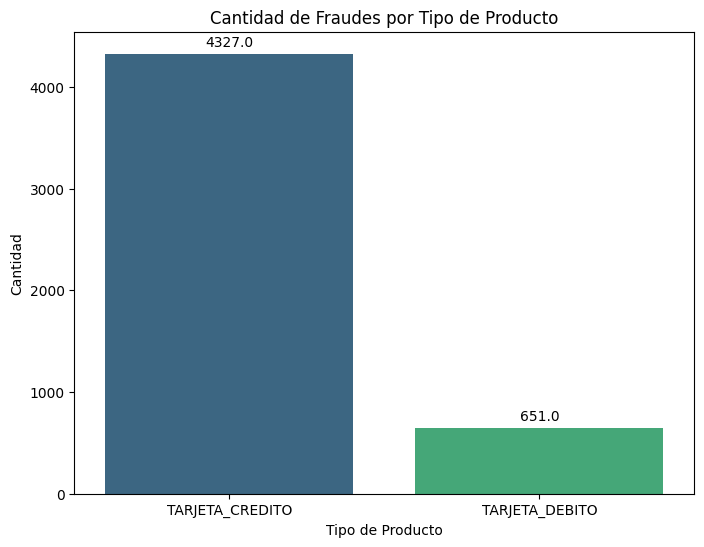

In [138]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='TIPO_PRODUCTO ', data=data_train, palette="viridis")
plt.title("Cantidad de Fraudes por Tipo de Producto")
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad")

# Añadir la cantidad sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


## 4. Creación y transformación de variables

In [139]:
data_train['DIAS_FRAUDE'] = (data_train['FECHA_DETECCION'] - data_train['FECHA_INICIAL']).dt.days
data_train['FRAUDES_POR_DIA'] = data_train['N_OPERACIONES'] / data_train['DIAS_FRAUDE']

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\3496449178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['DIAS_FRAUDE'] = (data_train['FECHA_DETECCION'] - data_train['FECHA_INICIAL']).dt.days
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\3496449178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FRAUDES_POR_DIA'] = data_train['N_OPERACIONES'] / data_train['DIAS_FRAUDE']


In [140]:
data_train['TIPO_PRODUCTO '] = data_train['TIPO_PRODUCTO '].apply(lambda x: 1 if x == 'TARJETA_CREDITO' else 0)
data_train.rename(columns={'TIPO_PRODUCTO ': 'TIPO_PRODUCTO'}, inplace=True)

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\14496644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['TIPO_PRODUCTO '] = data_train['TIPO_PRODUCTO '].apply(lambda x: 1 if x == 'TARJETA_CREDITO' else 0)
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\14496644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.rename(columns={'TIPO_PRODUCTO ': 'TIPO_PRODUCTO'}, inplace=True)


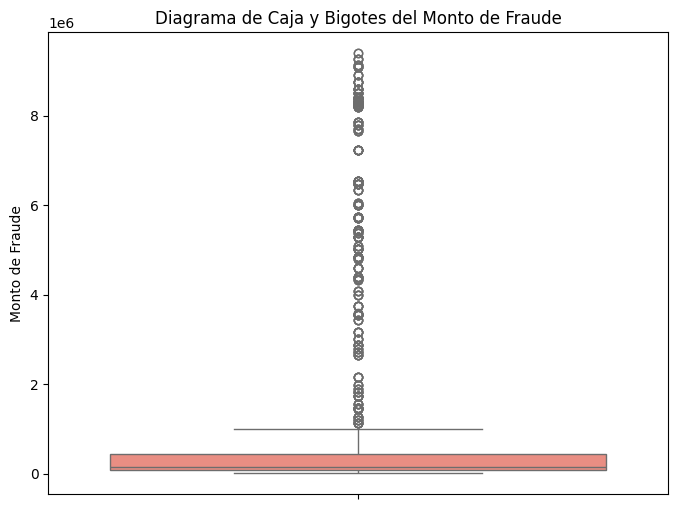

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='MONTO_FRAUDE', data=data_train, color="salmon")
plt.title("Diagrama de Caja y Bigotes del Monto de Fraude")
plt.ylabel("Monto de Fraude")
plt.show()

In [142]:
data_train

,ID,MONTO_FRAUDE,FECHA_INICIAL,FECHA_DETECCION,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
2229,2230,17130,2023-02-02,2023-02-06,1,1,0,0,4,0.250000
3796,3797,600416,2023-01-29,2023-01-30,8,1,0,0,1,8.000000
3581,3582,47940,2023-01-05,2023-01-08,2,1,0,0,3,0.666667
4030,4031,74236,2023-02-23,2023-02-25,3,1,0,0,2,1.500000
3629,3630,38865,2023-01-11,2023-01-13,1,1,0,0,2,0.500000
...,...,...,...,...,...,...,...,...,...,...
994,995,91866,2023-04-29,2023-05-02,4,0,0,0,3,1.333333
7108,7109,440760,2023-02-13,2023-02-16,3,1,0,8,3,1.000000
5083,5084,113169,2023-03-10,2023-03-16,5,1,0,6,6,0.833333
5679,5680,157043,2023-04-19,2023-04-21,1,0,0,0,2,0.500000


C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\3236311020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FLAG_CLIENTE_EMPRESA', data=data_train, palette="viridis")


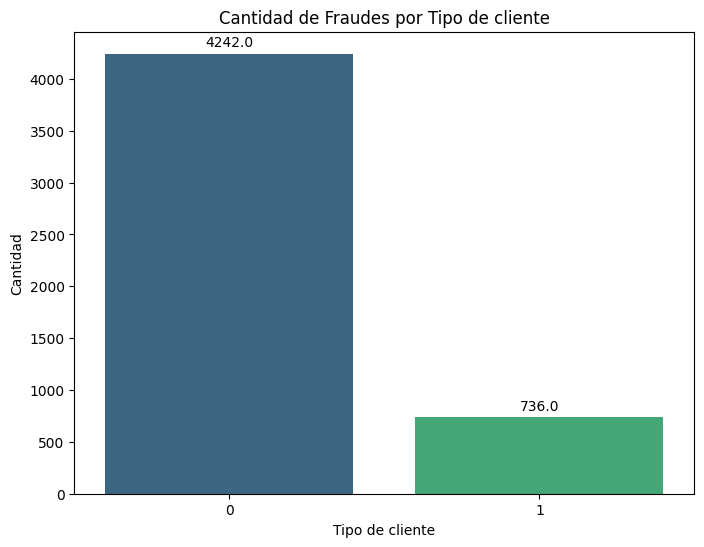

In [143]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FLAG_CLIENTE_EMPRESA', data=data_train, palette="viridis")
plt.title("Cantidad de Fraudes por Tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Cantidad")

# Añadir la cantidad sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


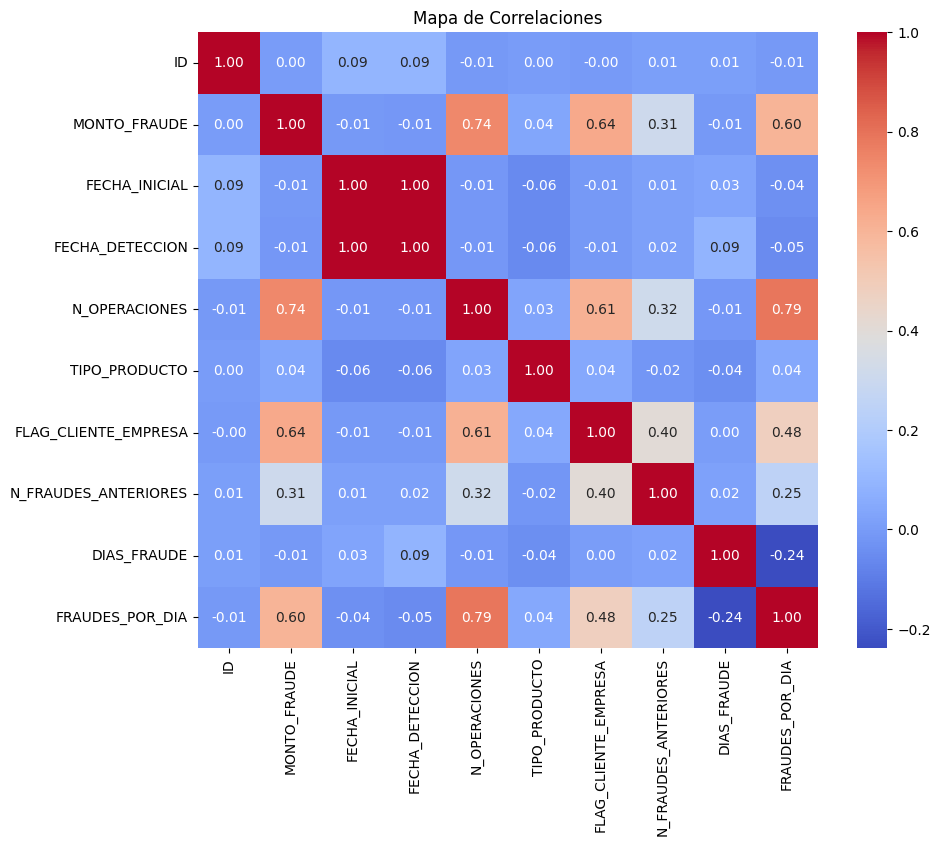

In [18]:
# Calcular la matriz de correlación
correlaciones = data_train.corr()

# Crear un heatmap para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlaciones")
plt.show()

## poner grafico que compara distribucion de variables continuas

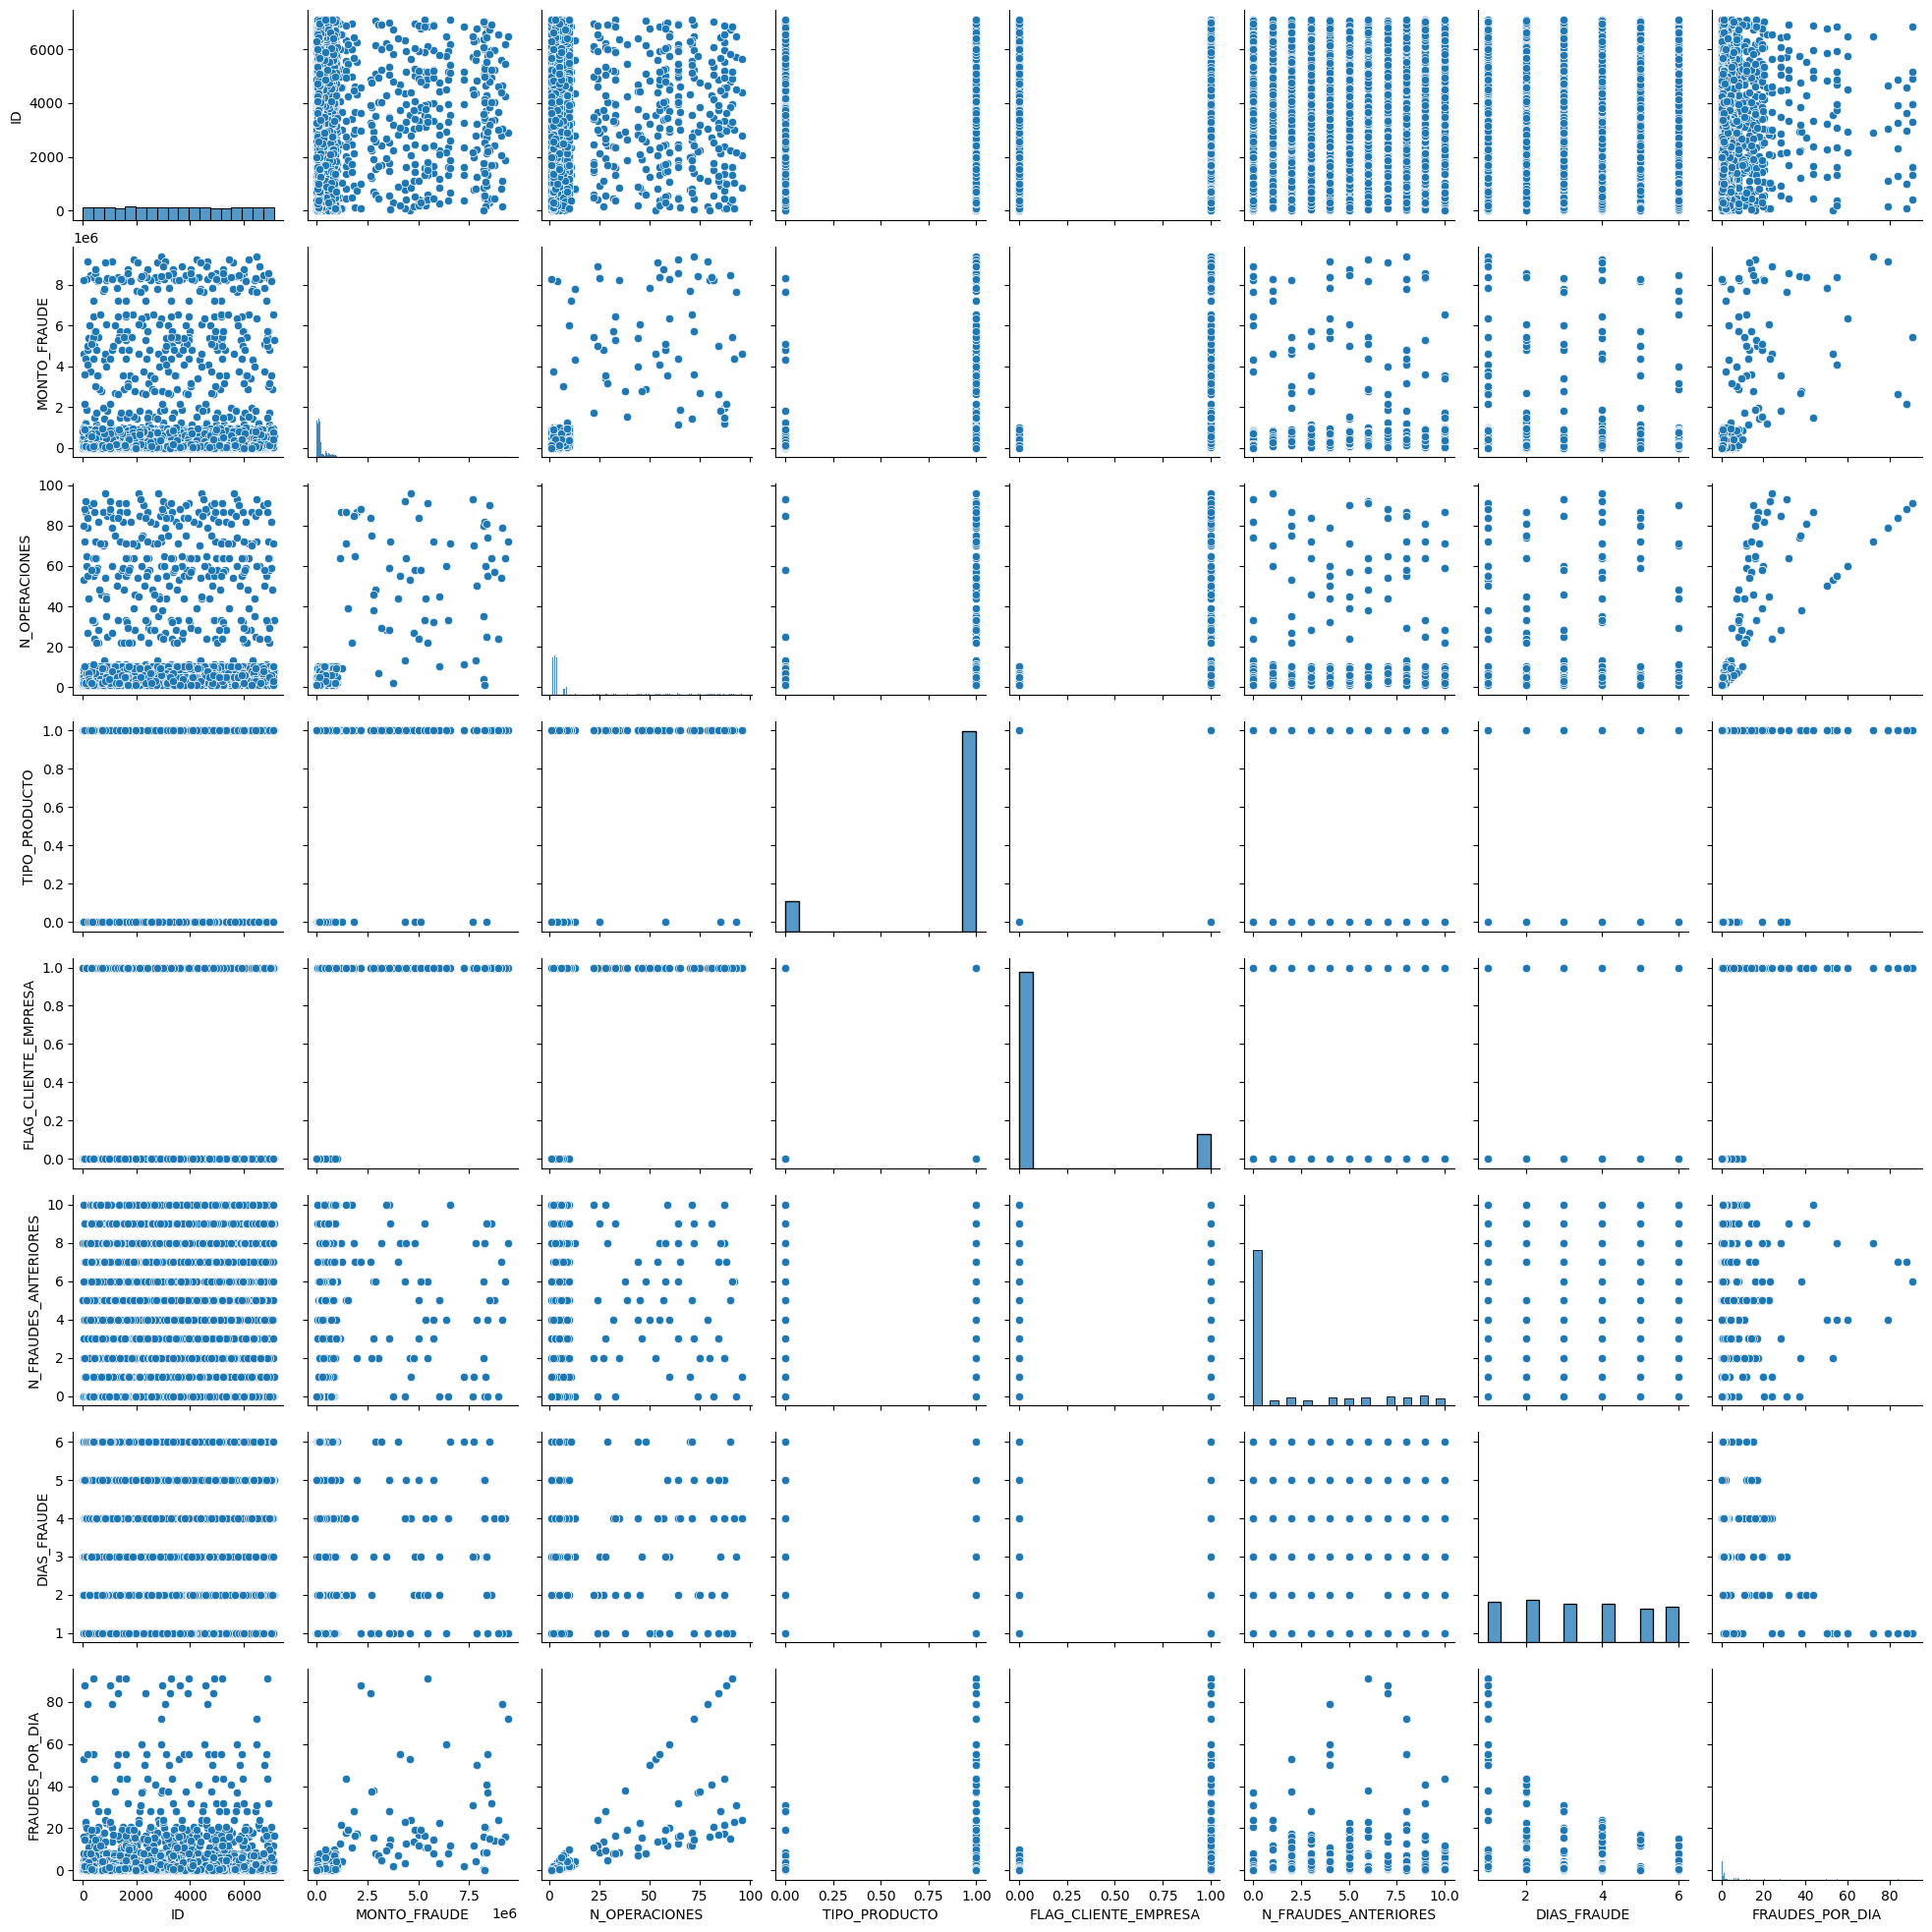

In [19]:
sns.pairplot(data_train)
plt.show()

In [144]:
data_test.columns

Index(['ID', 'MONTO_FRAUDE', 'FECHA_INICIAL', 'FECHA_DETECCION',
       'N_OPERACIONES', 'TIPO_PRODUCTO ', 'FLAG_CLIENTE_EMPRESA',
       'N_FRAUDES_ANTERIORES'],
      dtype='object')

In [145]:
data_test['TIPO_PRODUCTO '] = data_test['TIPO_PRODUCTO '].replace({'TARJETA_CREDITO': 1, 'TARJETA_DEBITO': 0})
data_train['TIPO_PRODUCTO'] = data_train['TIPO_PRODUCTO'].replace({'TARJETA_CREDITO': 1, 'TARJETA_DEBITO': 0})

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4113655833.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['TIPO_PRODUCTO '] = data_test['TIPO_PRODUCTO '].replace({'TARJETA_CREDITO': 1, 'TARJETA_DEBITO': 0})
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4113655833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['TIPO_PRODUCTO'] = data_train['TIPO_PRODUCTO'].replace({'TARJETA_CREDITO': 1, 'TARJETA_DEBITO': 0})


In [146]:
# Calcular DIAS_FRAUDE
data_test['FECHA_INICIAL'] = pd.to_datetime(data_test['FECHA_INICIAL'], format='%d-%m-%Y')
data_test['FECHA_DETECCION'] = pd.to_datetime(data_test['FECHA_DETECCION'], format='%d-%m-%Y')
data_test['DIAS_FRAUDE'] = (data_test['FECHA_DETECCION'] - data_test['FECHA_INICIAL']).dt.days

# Calcular FRAUDES_POR_DIA
data_test['FRAUDES_POR_DIA'] = data_test['N_OPERACIONES'] / data_test['DIAS_FRAUDE'].replace(0, np.nan)

In [147]:
# Calcular DIAS_FRAUDE
data_train['FECHA_INICIAL'] = pd.to_datetime(data_train['FECHA_INICIAL'], format='%d-%m-%Y')
data_train['FECHA_DETECCION'] = pd.to_datetime(data_train['FECHA_DETECCION'], format='%d-%m-%Y')
data_train['DIAS_FRAUDE'] = (data_train['FECHA_DETECCION'] - data_train['FECHA_INICIAL']).dt.days

# Calcular FRAUDES_POR_DIA
data_train['FRAUDES_POR_DIA'] = data_train['N_OPERACIONES'] / data_train['DIAS_FRAUDE'].replace(0, np.nan)

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4135636730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FECHA_INICIAL'] = pd.to_datetime(data_train['FECHA_INICIAL'], format='%d-%m-%Y')
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4135636730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FECHA_DETECCION'] = pd.to_datetime(data_train['FECHA_DETECCION'], format='%d-%m-%Y')
C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\4135636730.py:4: SettingWithCopyWarni

In [148]:
data_train = data_train.drop(columns=['ID', 'FECHA_INICIAL', 'FECHA_DETECCION'])
data_test = data_test.drop(columns=['ID', 'FECHA_INICIAL', 'FECHA_DETECCION'])

In [149]:
data_train

,MONTO_FRAUDE,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
2229,17130,1,1,0,0,4,0.250000
3796,600416,8,1,0,0,1,8.000000
3581,47940,2,1,0,0,3,0.666667
4030,74236,3,1,0,0,2,1.500000
3629,38865,1,1,0,0,2,0.500000
...,...,...,...,...,...,...,...
994,91866,4,0,0,0,3,1.333333
7108,440760,3,1,0,8,3,1.000000
5083,113169,5,1,0,6,6,0.833333
5679,157043,1,0,0,0,2,0.500000


In [150]:
lista_var_numericas = list(data_train.select_dtypes(include=['float64','int64']).columns)

In [31]:
lista_var_numericas

['MONTO_FRAUDE',
 'N_OPERACIONES',
 'TIPO_PRODUCTO',
 'FLAG_CLIENTE_EMPRESA',
 'N_FRAUDES_ANTERIORES',
 'DIAS_FRAUDE',
 'FRAUDES_POR_DIA']

In [32]:
from scipy.stats import normaltest

def dagostino_v2(data_train,col):
    stat, p = normaltest(data_train[col])
    return stat,p

lista_sd = []

lista_pd = []

lista_cd = []

for col in lista_var_numericas:
    x2,y2 = dagostino_v2(data_train,col)
    
    lista_sd.append(x2)
    
    lista_pd.append(y2)
    
    lista_cd.append(col)
    
df_dag = pd.DataFrame((zip(lista_cd,lista_sd, lista_pd)), columns = ['Variable','Estadistico','P_value'])
df_dag


df_dag['p_value > 0.05'] = 'N'
# se completa el nuevo vector objetivo dependiendo de los atributos
for index, row in df_dag.iterrows():    
    if row['P_value'] > 0.05:
        df_dag.at[index,'p_value > 0.05'] = 'Y'
df_dag

,Variable,Estadistico,P_value,p_value > 0.05
0,MONTO_FRAUDE,4035.326087,0.000000e+00,N
1,N_OPERACIONES,4161.387487,0.000000e+00,N
2,TIPO_PRODUCTO,1963.313955,0.000000e+00,N
3,FLAG_CLIENTE_EMPRESA,1685.729595,0.000000e+00,N
4,N_FRAUDES_ANTERIORES,938.423625,1.674554e-204,N
5,DIAS_FRAUDE,7056.195404,0.000000e+00,N
6,FRAUDES_POR_DIA,6226.851987,0.000000e+00,N


In [34]:
def shapiro_test_df(dataframe):
    resultados = []
    for col in dataframe.select_dtypes(include='number').columns:  # Solo columnas numéricas
        stat, p = shapiro(dataframe[col])  # Aplica Shapiro-Wilk
        resultados.append({
            'Columna': col,
            'Estadístico': stat,
            'p-valor': p,
            'Normalidad': 'Normal' if p > 0.05 else 'No Normal'
        })
    return pd.DataFrame(resultados)

# Llama a la función y muestra los resultados
resultados_shapiro = shapiro_test_df(data_train)  # 'datos' es tu DataFrame
print(resultados_shapiro)

                Columna  Estadístico       p-valor Normalidad
0          MONTO_FRAUDE     0.384243  1.318328e-84  No Normal
1         N_OPERACIONES     0.384455  1.341732e-84  No Normal
2         TIPO_PRODUCTO     0.396906  3.812170e-84  No Normal
3  FLAG_CLIENTE_EMPRESA     0.423214  3.687497e-83  No Normal
4  N_FRAUDES_ANTERIORES     0.645174  8.280279e-73  No Normal
5           DIAS_FRAUDE     0.906167  4.563139e-48  No Normal
6       FRAUDES_POR_DIA     0.315246  5.529998e-87  No Normal


In [104]:
# Seleccionar variables predictoras y objetivo
X_train = data_train[['N_OPERACIONES', 'TIPO_PRODUCTO', 'FLAG_CLIENTE_EMPRESA', 
                'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE', 'FRAUDES_POR_DIA']]
y_train = data_train['MONTO_FRAUDE']

In [151]:
X_test = data_train[['N_OPERACIONES', 'TIPO_PRODUCTO', 'FLAG_CLIENTE_EMPRESA', 
                'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE', 'FRAUDES_POR_DIA']]
y_test = data_train['MONTO_FRAUDE']

In [39]:
X_train_est = pd.DataFrame()
for col in list(X_train.columns):
    X_train_est[col] = (X_train[col] - X_train[col].mean())/(X_train[col].std())

In [40]:
X_test_est = pd.DataFrame()
for col in list(X_train.columns):
    X_test_est[col] = (X_test[col] - X_test[col].mean())/(X_test[col].std())

In [41]:
X_train_est.corr(method='pearson')

,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
N_OPERACIONES,1.000000,0.030685,0.612349,0.315361,-0.011952,0.791671
TIPO_PRODUCTO,0.030685,1.000000,0.042386,-0.019989,-0.040656,0.044402
FLAG_CLIENTE_EMPRESA,0.612349,0.042386,1.000000,0.401580,0.003199,0.478576
N_FRAUDES_ANTERIORES,0.315361,-0.019989,0.401580,1.000000,0.022478,0.247579
DIAS_FRAUDE,-0.011952,-0.040656,0.003199,0.022478,1.000000,-0.238762
FRAUDES_POR_DIA,0.791671,0.044402,0.478576,0.247579,-0.238762,1.000000


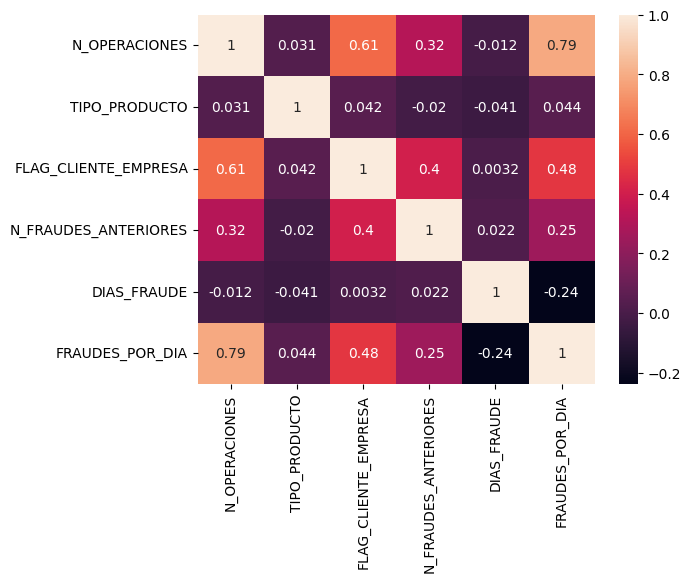

In [42]:
ax = sns.heatmap(X_train_est.corr(method='pearson'),annot=True)
plt.show()

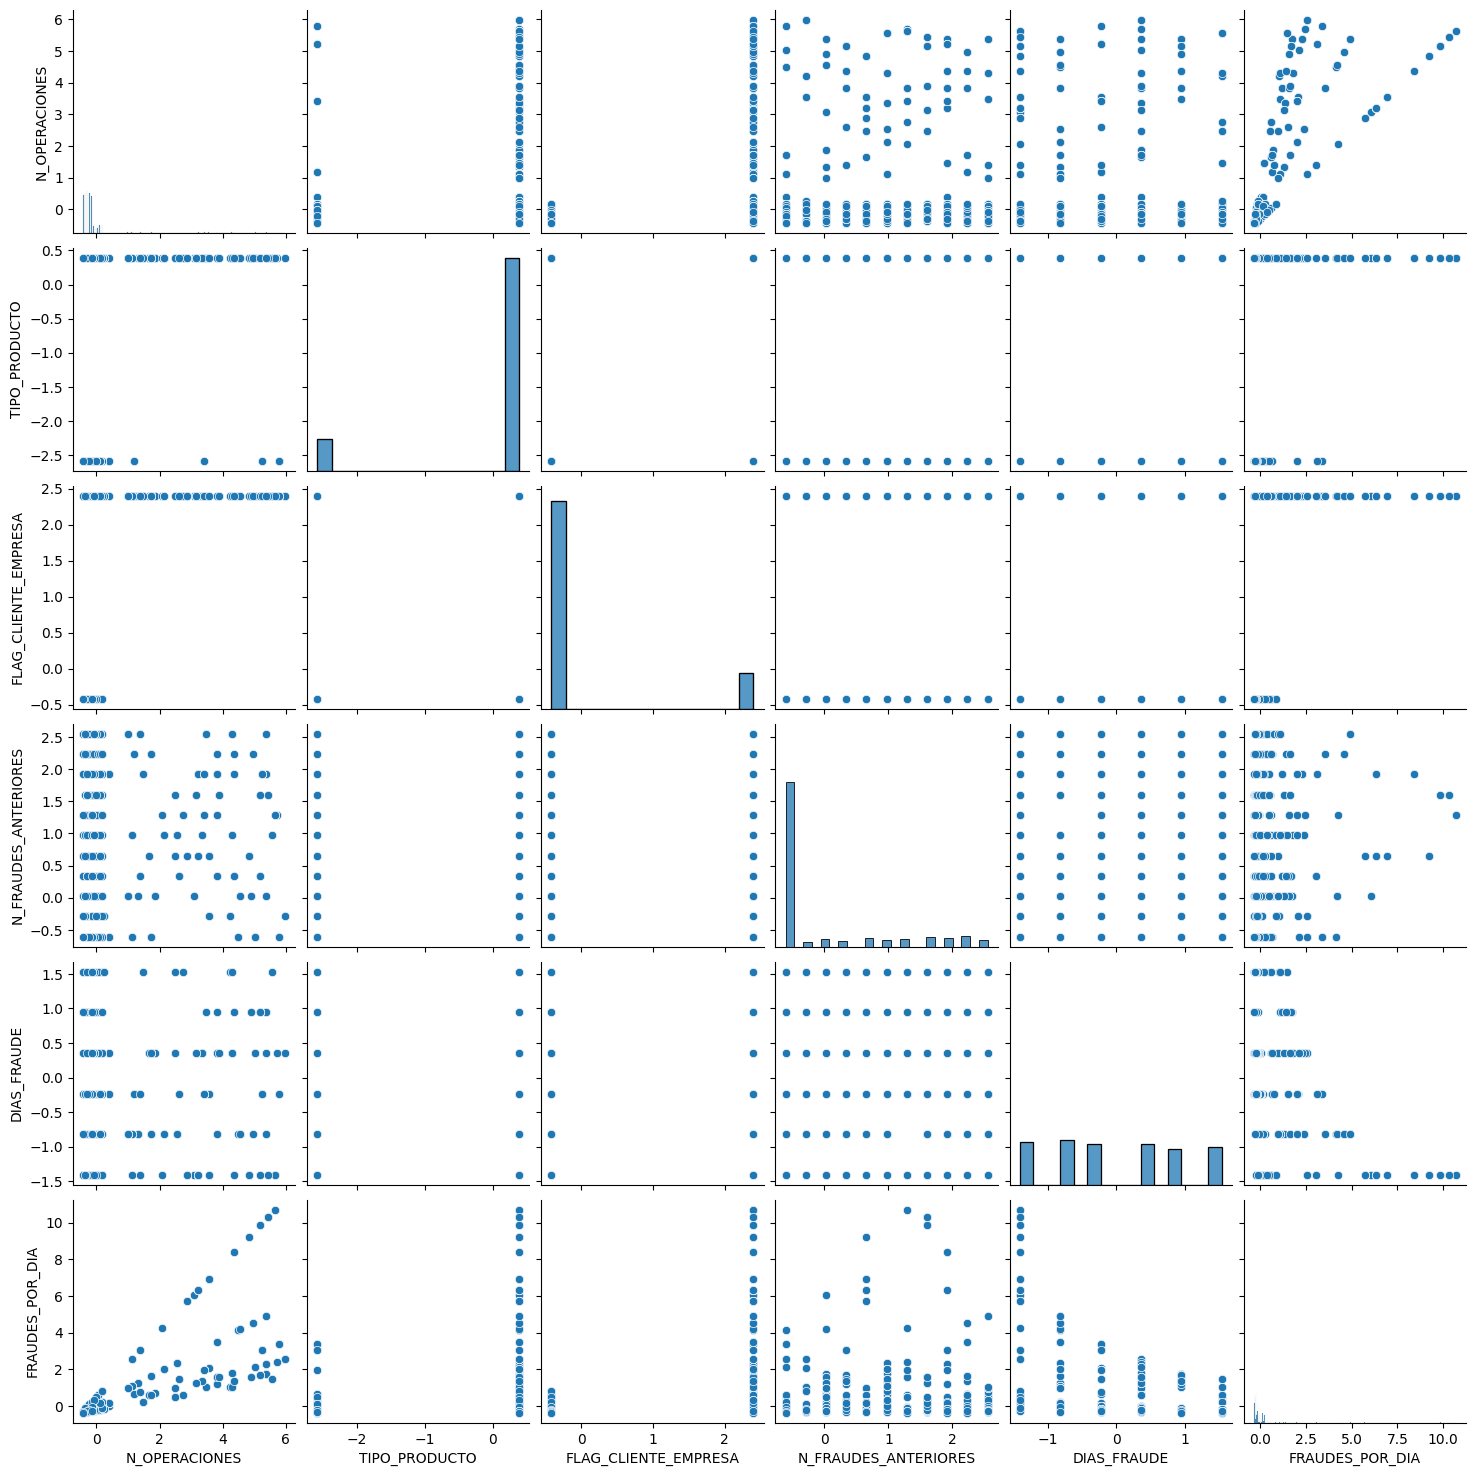

In [43]:
sns.pairplot(X_train_est)
plt.show()

In [152]:
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

In [45]:
data_train

,MONTO_FRAUDE,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
2229,17130,1,1,0,0,4,0.250000
3796,600416,8,1,0,0,1,8.000000
3581,47940,2,1,0,0,3,0.666667
4030,74236,3,1,0,0,2,1.500000
3629,38865,1,1,0,0,2,0.500000
...,...,...,...,...,...,...,...
994,91866,4,0,0,0,3,1.333333
7108,440760,3,1,0,8,3,1.000000
5083,113169,5,1,0,6,6,0.833333
5679,157043,1,0,0,0,2,0.500000


In [153]:
variables_regresoras = ['N_OPERACIONES', 'TIPO_PRODUCTO', 'FLAG_CLIENTE_EMPRESA', 'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE', 'FRAUDES_POR_DIA'] 

In [108]:
def get_zscore(dataframe,col):
    preproc=dataframe[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())

    return (preproc - get_mean) / get_std


for col in variables_regresoras:
    data_train[col] = get_zscore(data_train,col)

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\3460016415.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[col] = get_zscore(data_train,col)


In [50]:
data_train

,MONTO_FRAUDE,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
2229,17130,-0.426740,0.387841,-0.416495,-0.604179,0.355641,-0.352382
3796,600416,0.045165,0.387841,-0.416495,-0.604179,-1.406518,0.591970
3581,47940,-0.359325,0.387841,-0.416495,-0.604179,-0.231745,-0.301610
4030,74236,-0.291910,0.387841,-0.416495,-0.604179,-0.819132,-0.200067
3629,38865,-0.426740,0.387841,-0.416495,-0.604179,-0.819132,-0.321919
...,...,...,...,...,...,...,...
994,91866,-0.224495,-2.577860,-0.416495,-0.604179,-0.231745,-0.220376
7108,440760,-0.291910,0.387841,-0.416495,1.917921,-0.231745,-0.260993
5083,113169,-0.157080,0.387841,-0.416495,1.287396,1.530414,-0.281302
5679,157043,-0.426740,-2.577860,-0.416495,-0.604179,-0.819132,-0.321919


In [52]:
modelo_1 = smf.ols('MONTO_FRAUDE ~ N_OPERACIONES+TIPO_PRODUCTO+FLAG_CLIENTE_EMPRESA+N_FRAUDES_ANTERIORES+DIAS_FRAUDE+FRAUDES_POR_DIA', data_train).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MONTO_FRAUDE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1286.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:50:35   Log-Likelihood:                -75650.
No. Observations:                4978   AIC:                         1.513e+05
Df Residuals:                    4971   BIC:                         1.514e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.157e+05   1.37e+04     45.071      0.000    5.89e+05    6.43e+05
N_OPERACIONES         8.208e+05   2.58e+04     31.786      0.000     7.7e+05    8.71e+05
TIPO_PRODUCTO         1.085e+04   1.37e+04      0.792      0.428    -1.6e+04    3.77e+04
FLAG_CLIENTE_EMPRESA  4.443e+05    1.8e+04     24.675      0.000    4.09e+05     4.8e+05
N_FRAUDES_ANTERIORES  3.095e+04    1.5e+04      2.063      0.039    1532.114    6.04e+04
DIAS_FRAUDE           3908.7167   1.48e+04      0.265      0.791    -2.5e+04    3.28e+04
FRAUDES_POR_DIA       5.209e+04   2.41e+04      2.158      0.031    4771.520    9.94e+04
==============================================================================
Omnibus:                     2600.127   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73392.207
Skew:                           1.932   Prob(JB):                         0.00
Kurtosis:                      21.410   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
modelo_2 = smf.ols('MONTO_FRAUDE ~ N_OPERACIONES+FLAG_CLIENTE_EMPRESA+N_FRAUDES_ANTERIORES+FRAUDES_POR_DIA', data_train).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MONTO_FRAUDE   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1929.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:51:42   Log-Likelihood:                -75651.
No. Observations:                4978   AIC:                         1.513e+05
Df Residuals:                    4973   BIC:                         1.513e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.157e+05   1.37e+04     45.077      0.000    5.89e+05    6.43e+05
N_OPERACIONES         8.222e+05   2.49e+04     33.033      0.000    7.73e+05    8.71e+05
FLAG_CLIENTE_EMPRESA  4.449e+05    1.8e+04     24.731      0.000     4.1e+05     4.8e+05
N_FRAUDES_ANTERIORES  3.057e+04    1.5e+04      2.040      0.041    1187.436    5.99e+04
FRAUDES_POR_DIA       5.028e+04   2.24e+04      2.248      0.025    6436.589    9.41e+04
==============================================================================
Omnibus:                     2603.581   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73619.353
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                      21.438   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(fit_intercept=True, n_jobs=None)

LinearRegression()

In [55]:
print ("Intercepto : ",linreg.intercept_)
print()
print ("Coeficientes : ",linreg.coef_)

Intercepto :  -49313.36272230616

Coeficientes :  [  55331.8019471    32186.14259489 1251615.69279041    9757.12354406
    2295.92723993    6346.66506357]


In [56]:
y_pred = linreg.predict(X_test)

In [57]:
y_pred

array([ 48974.95704528, 478596.44319784, 104655.27552894, ...,
       337138.981865  ,  13783.62623643,  50953.55103203])

In [60]:
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error (MAE) :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error (MSE) : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error (RMSE): ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.6081260409414604


mean_absolute_error (MAE) : 406684.19470995234


mean_squared_error (MSE) :  927752084818.9542


root_mean_squared_error (RMSE):  963198.8812384254


## Revisar si hay outliers o valores atípicos en los datos


In [154]:
df=data_train.copy()
# Calcular Q1, Q3 y el IQR
Q1 = df['MONTO_FRAUDE'].quantile(0.25)
Q3 = df['MONTO_FRAUDE'].quantile(0.75)
IQR = Q3 - Q1

# Límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df[(df['MONTO_FRAUDE'] < lower_bound) | (df['MONTO_FRAUDE'] > upper_bound)]
print(f"Valores atípicos:\n{outliers}")

Valores atípicos:
      MONTO_FRAUDE  N_OPERACIONES  TIPO_PRODUCTO  FLAG_CLIENTE_EMPRESA  \
1329       8386931             55              1                     1   
5527       1984523             87              1                     1   
915        1813973             85              0                     1   
1892       9260637             64              1                     1   
2356       6474835             33              1                     1   
...            ...            ...            ...                   ...   
654        6549140             71              1                     1   
4928       1463165             87              1                     1   
4976       8268211              1              1                     1   
4523       6344305             60              1                     1   
2420       5723618             72              1                     1   

      N_FRAUDES_ANTERIORES  DIAS_FRAUDE  FRAUDES_POR_DIA  
1329                     4        

In [155]:
# Eliminar valores atípicos
df_sin_outliers = df[(df['MONTO_FRAUDE'] >= lower_bound) & (df['MONTO_FRAUDE'] <= upper_bound)]


In [156]:
def get_zscore(dataframe,col):
    preproc=dataframe[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())

    return (preproc - get_mean) / get_std


for col in variables_regresoras:
    df_sin_outliers[col] = get_zscore(df_sin_outliers,col)

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_26448\1105214113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers[col] = get_zscore(df_sin_outliers,col)


In [157]:
df_sin_outliers

,MONTO_FRAUDE,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
2229,17130,-1.197500,0.392337,-0.291285,-0.548028,0.348277,-0.866986
3796,600416,1.870927,0.392337,-0.291285,-0.548028,-1.411075,4.251548
3581,47940,-0.759153,0.392337,-0.291285,-0.548028,-0.238174,-0.591796
4030,74236,-0.320807,0.392337,-0.291285,-0.548028,-0.824624,-0.041416
3629,38865,-1.197500,0.392337,-0.291285,-0.548028,-0.824624,-0.701872
...,...,...,...,...,...,...,...
994,91866,0.117540,-2.548274,-0.291285,-0.548028,-0.238174,-0.151492
7108,440760,-0.320807,0.392337,-0.291285,2.098376,-0.238174,-0.371644
5083,113169,0.555887,0.392337,-0.291285,1.436775,1.521178,-0.481720
5679,157043,-1.197500,-2.548274,-0.291285,-0.548028,-0.824624,-0.701872


In [158]:
X_train = df_sin_outliers[['N_OPERACIONES', 'TIPO_PRODUCTO', 'FLAG_CLIENTE_EMPRESA', 
                'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE', 'FRAUDES_POR_DIA']]
y_train = df_sin_outliers['MONTO_FRAUDE']

In [159]:
data_test.columns

Index(['MONTO_FRAUDE', 'N_OPERACIONES', 'TIPO_PRODUCTO ',
       'FLAG_CLIENTE_EMPRESA', 'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE',
       'FRAUDES_POR_DIA'],
      dtype='object')

In [160]:
data_test

,MONTO_FRAUDE,N_OPERACIONES,TIPO_PRODUCTO,FLAG_CLIENTE_EMPRESA,N_FRAUDES_ANTERIORES,DIAS_FRAUDE,FRAUDES_POR_DIA
7,161774,5,1,0,0,1,5.000000
12,143045,1,0,0,0,2,0.500000
13,66700,1,1,0,0,2,0.500000
18,10887,1,1,0,0,2,0.500000
19,50577,5,1,0,0,5,1.000000
...,...,...,...,...,...,...,...
7097,173070,1,1,0,0,4,0.250000
7098,68668,2,1,0,0,1,2.000000
7101,22917,6,1,0,3,1,6.000000
7105,144803,2,1,0,0,2,1.000000


In [161]:
data_test.columns = data_test.columns.str.strip()

In [162]:
def get_zscore(dataframe,col):
    preproc=dataframe[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())

    return (preproc - get_mean) / get_std


for col in variables_regresoras:
    data_test[col] = get_zscore(data_test,col)

In [167]:
X_test = data_test[['N_OPERACIONES', 'TIPO_PRODUCTO', 'FLAG_CLIENTE_EMPRESA', 
                'N_FRAUDES_ANTERIORES', 'DIAS_FRAUDE', 'FRAUDES_POR_DIA']]
y_test = data_test['MONTO_FRAUDE']

In [164]:
y_train

2229     17130
3796    600416
3581     47940
4030     74236
3629     38865
         ...  
994      91866
7108    440760
5083    113169
5679    157043
1979     10720
Name: MONTO_FRAUDE, Length: 4602, dtype: int64

In [169]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(fit_intercept=True, n_jobs=None)

LinearRegression()

In [170]:
print ("Intercepto : ",linreg.intercept_)
print()
print ("Coeficientes : ",linreg.coef_)

Intercepto :  228249.93633202955

Coeficientes :  [  5386.60260886   -865.92639476  28846.6490693  138888.11630199
  15122.09912554  33626.75650306]


In [171]:
y_pred = linreg.predict(X_test)

In [172]:
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error (MAE) :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error (MSE) : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error (RMSE): ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.05563336917217099


mean_absolute_error (MAE) : 417087.22543302417


mean_squared_error (MSE) :  1889879084729.7202


root_mean_squared_error (RMSE):  1374728.7313247367


## Modelos

In [44]:
# Crear el modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Evaluar en los datos de entrenamiento
y_train_pred = modelo_lineal.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Entrenamiento - Error cuadrático medio (MSE): {mse_train:.2f}")
print(f"Entrenamiento - Coeficiente de determinación (R^2): {r2_train:.2f}")

# Evaluar en los datos de prueba
y_test_pred = modelo_lineal.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Prueba - Error cuadrático medio (MSE): {mse_test:.2f}")
print(f"Prueba - Coeficiente de determinación (R^2): {r2_test:.2f}")

Entrenamiento - Error cuadrático medio (MSE): 927752084818.95
Entrenamiento - Coeficiente de determinación (R^2): 0.61
Prueba - Error cuadrático medio (MSE): 761439296402.17
Prueba - Coeficiente de determinación (R^2): 0.62


In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Prueba Ridge - MSE: {mse_ridge:.2f}, R^2: {r2_ridge:.2f}")

Prueba Ridge - MSE: 761320006666.51, R^2: 0.62


El R² de 0.62 sugiere que hay un 38% de la variabilidad en MONTO_FRAUDE que el modelo no está explicando, posiblemente porque:
Hay relaciones no lineales que un modelo lineal (incluso con regularización) no puede capturar.
Faltan variables importantes o interacciones entre las existentes.

In [46]:
from sklearn.linear_model import LassoCV

# Usar Lasso con validación cruzada para ajustar el valor óptimo de alpha
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Mejor valor de alpha
print(f"Mejor valor de alpha: {lasso_cv.alpha_}")

# Evaluar el modelo con el mejor alpha
y_test_pred_lasso_cv = lasso_cv.predict(X_test)
mse_test_lasso_cv = mean_squared_error(y_test, y_test_pred_lasso_cv)
r2_test_lasso_cv = r2_score(y_test, y_test_pred_lasso_cv)

print(f"Prueba Lasso (con CV) - MSE: {mse_test_lasso_cv:.2f}")
print(f"Prueba Lasso (con CV) - R^2: {r2_test_lasso_cv:.2f}")

Mejor valor de alpha: 10.0
Prueba Lasso (con CV) - MSE: 761433146286.05
Prueba Lasso (con CV) - R^2: 0.62
